# Operation time of measurement sets
Here we calculate the time spent on some measurement sets: Pauli, Stoke, MUB, and SIC.

In [1]:
import time
import numpy as np
from tqix import *
import matplotlib.pyplot as plt

# 1. Number of repeated measurements

In [2]:
N = 100

# 2. For Pauli and Stoke sets
## Pauli:
We choose three POVMs for one-qubit systems:
$$\{ |H\rangle\langle H|, |V\rangle\langle V|\}; \{ |D\rangle\langle D|, |A\rangle\langle A|\}; \{ |L\rangle\langle L|, |R\rangle\langle R|\},$$
    where $|H\rangle = \binom{1}{0}$, $|V\rangle = \binom{0}{1}$, $|D\rangle = \frac{1}{\sqrt{2}}\bigl(\begin{smallmatrix}
    1 \\ 1
    \end{smallmatrix}
    \bigr)$, $|A\rangle = \frac{1}{\sqrt{2}}\binom{1}{-1}$, $|L\rangle = \frac{1}{\sqrt{2}}\binom{1}{i}$, $|R\rangle = \frac{1}{\sqrt{2}}\binom{1}{-i}$.
    
## Stoke:
In this scheme, four measurements can be chosen arbitrarily from six mentioned elements, i.e., they are $|H\rangle\langle H|, |V\rangle\langle V|, |D\rangle\langle D|, |A\rangle\langle A|.$

**Tensor product will be used for n-qubit system, $n>1$.**


In [3]:
dim_p,time_p = [],[]
time_s = []
for n in range (1,4):
    #n: number of quibts
    dtime_p = 0.0
    dtime_s = 0.0
    for i in range(N):
        state = random(2**n)
        ###
        model = qmeas(state,'Pauli')
        dtime = model.mtime() #measure time
        dtime_p += dtime
        model = qmeas(state,'Stoke')
        dtime = model.mtime()
        dtime_s += dtime
        
    dtime_p /= float(N)
    dtime_s /= float(N)
    dim_p.append(2**n)
    time_p.append(dtime_p)
    time_s.append(dtime_s)

# 3. For MUB set
In a finite dimensional Hilbert space $\mathcal{H}_d$, two orthonormal bases $\{|e_i\rangle\}$ and $\{|f_i\rangle\}$ are said to be **mutually unbiased (MUB)** if 
$$|\langle e_i |f_i\rangle |^2=\frac{1}{d},\; \forall i,j\in [1,d]. $$

In [4]:
dim_mub,time_mub = [],[]
for d in (2,3,4,5,7):
    dtime_mub = 0.0
    for i in range(N):
        state = random(d)
        ###
        model = qmeas(state,'MUB')
        dtime = model.mtime()
        dtime_mub += dtime
    dtime_mub /= float(N)
    dim_mub.append(d)
    time_mub.append(dtime_mub)

# 4. For SIC set
In a finite dimensional Hilbert space $\mathcal{H}_d$, a basis $\{|h_i\rangle\}$ is said to be **symmetric informationally complete (SIC)** when all the inner products between different elements are equal, and
their projectors are complete 
$$|\langle h_i |h_i\rangle |^2=\frac{1}{d+1},\; \forall i\neq j. $$

In [5]:
dim_sic, time_sic = [],[]
for d in range(2,9):
    dtime_sic = 0.0
    for i in range(N):
        state = random(d)
        ###
        model = qmeas(state,'SIC')
        dtime = model.mtime()
        dtime_sic += dtime
    dtime_sic /= float(N)
    dim_sic.append(d)
    time_sic.append(dtime_sic)

# 5. Plotting the result

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


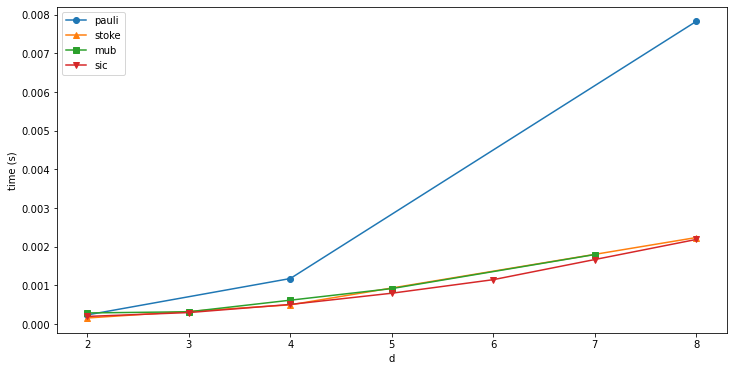

In [6]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(dim_p, time_p, marker = 'o')
ax1.plot(dim_p, time_s, marker = '^')
ax1.plot(dim_mub, time_mub, marker = 's')
ax1.plot(dim_sic, time_sic, marker = 'v')
ax1.legend(('pauli','stoke','mub','sic'))
ax1.set_xlabel('d')
ax1.set_ylabel('time (s)')
plt.savefig('time_povm.eps')
plt.show()

In [7]:
about()


tqix: Quantum computor Simulation code
copyright (c) 2019 and later.
authors: Binho Le 

tqix Version:       1.0.1
Numpy Version:      1.18.5
Scipy Version:      1.5.0
Cython Version:     0.29.21
Matplotlib Version: 3.2.2
Python Version:     3.8.3
Number of CPUs:     2
Platform Info:      Windows (AMD64)

